# K-MEANS

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
df=pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

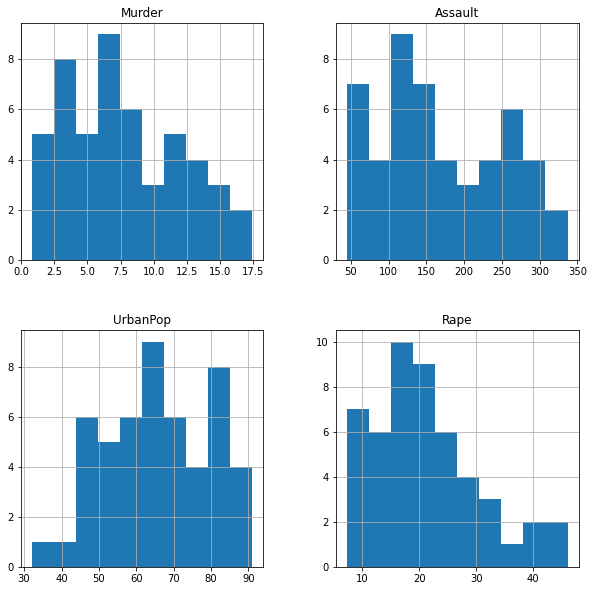

In [9]:
df.hist(figsize=(10,10))

In [13]:
k_means=KMeans(n_clusters = 4)

In [14]:
k_fit=k_means.fit(df)

In [15]:
k_fit.n_clusters

4

In [18]:
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [20]:
t=k_fit.labels_   #gözlem birimlerinin hangi cluster da oludugunu verir

In [27]:
t

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

In [26]:
len(t)

50

In [28]:
# kümelerin görselleştilmesi

In [30]:
k_means=KMeans(n_clusters = 2).fit(df)

In [31]:
kumeler=k_means.labels_

In [32]:
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

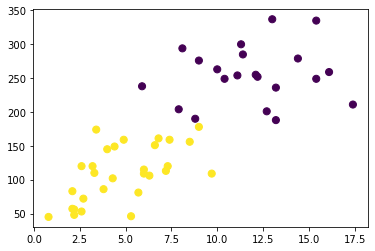

In [36]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis");

In [38]:
merkezler=k_means.cluster_centers_

In [39]:
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

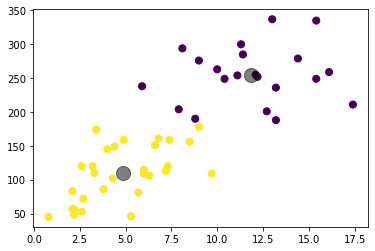

In [41]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis");
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5);

# Optimum küme sayısının belirlenmesi

# Elbow Yöntemi

In [50]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [51]:
ssd=[]
K=range(1,30)
for k in K:
    kmeans=KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)
    

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'optimum küme saysını içeren elbow yöntemi')

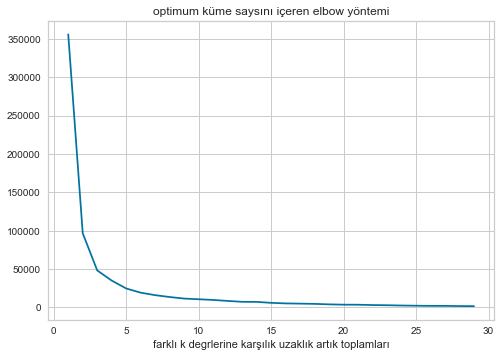

In [52]:
plt.plot(K,ssd,"bx-")
plt.xlabel("farklı k degrlerine karşılık uzaklık artık toplamları")
plt.title("optimum küme saysını içeren elbow yöntemi")

In [53]:
# yukarıda manuel olarak yaptığımız işlemi otomotik olarak yapıyoruz

In [54]:
from yellowbrick.cluster import KElbowVisualizer

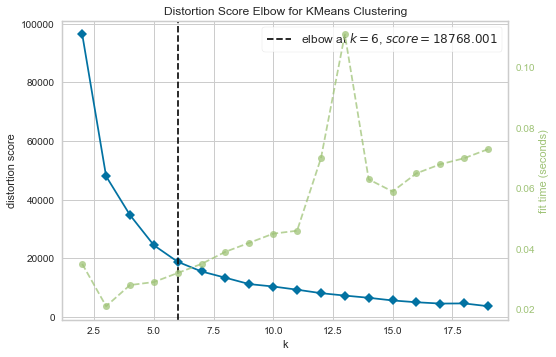

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k= (2,20))
visu.fit(df)
visu.poof()

In [56]:
kmeans=KMeans(n_clusters=4).fit(df)

In [59]:
kumeler=kmeans.labels_

In [60]:
pd.DataFrame({"Eyaletler":df.index,"Kumeler":kumeler})

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,3
4,California,0
5,Colorado,3
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,3


In [61]:
df["Kume_No"]=kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,3


# HİYERARŞİK KÜMELEME

In [62]:
from scipy.cluster.hierarchy import linkage

In [63]:
hc_complete=linkage(df,"complete")
hc_average=linkage(df,"average")

In [64]:
from scipy.cluster.hierarchy import dendrogram

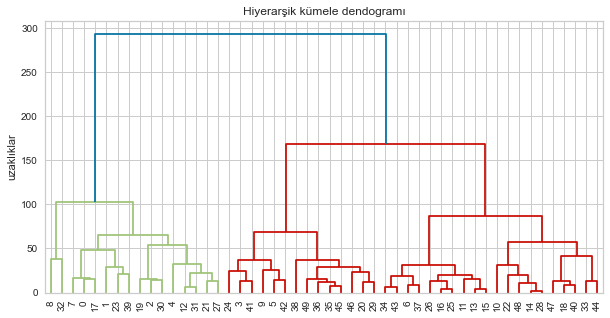

In [66]:
plt.figure(figsize=(10,5))  # grafiğin boyutnu ayarlıyoruz
plt.title("Hiyerarşik kümele dendogramı")
plt.xlabel=("gözlem birirmi")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,
          leaf_font_size=10 # x eksenindeki indexlerin byutunu ifade ediyor
          );

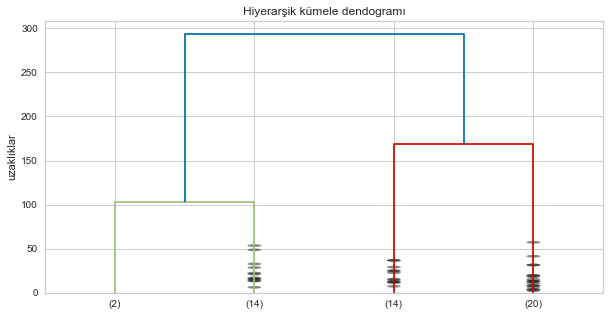

In [94]:
plt.figure(figsize=(10,5))  # grafiğin boyutnu ayarlıyoruz
plt.title("Hiyerarşik kümele dendogramı")
plt.xlabel=("gözlem birirmi")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=4,
           show_contracted=True,
          leaf_font_size=10
          );

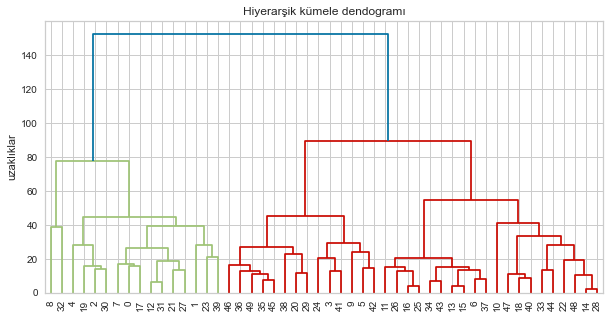

In [68]:
plt.figure(figsize=(10,5))  # grafiğin boyutnu ayarlıyoruz
plt.title("Hiyerarşik kümele dendogramı")
plt.xlabel=("gözlem birirmi")
plt.ylabel("uzaklıklar")
dendrogram(hc_average,
          leaf_font_size=10 # x eksenindeki indexlerin byutunu ifade ediyor
          );

# TEMEL BİLEŞEN ANALİZİ

In [69]:
df=pd.read_csv("Hitters.csv")
df.dropna(inplace=True)
df=df._get_numeric_data()  # sadece sayısal degerlei cekiyor
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
df=StandardScaler().fit_transform(df)

In [72]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca=PCA(n_components=2)

In [76]:
pca_fit=pca.fit_transform(df)

In [77]:
bilesen_df= pd.DataFrame(data=pca_fit,columns=["birinci_bilesen","ikinci_bilesen"])

In [78]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [80]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

In [85]:
pca.components_[0]

array([ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
        0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
        0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
       -0.00529271,  0.24914187])

TypeError: 'str' object is not callable

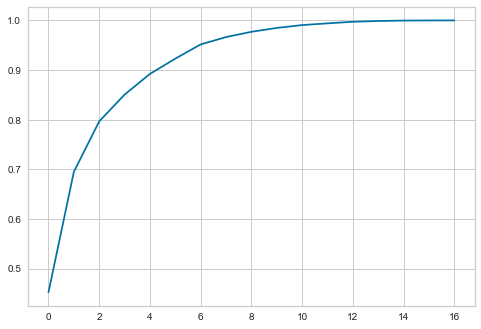

In [89]:
# optimumbilesen sayisi
pca=PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bilesen sayisini")
plt.ylabel("kümülatif varyans orani");

In [90]:
#final

In [91]:
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [92]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])

deneme
